In [1]:
from numpy import cos
import matplotlib.pyplot as plt

# Q1: Use RK4 to solve the damped and forced harmonic oscillator satisfying

#### $$2\ddot y + \gamma\dot y + 2y = 2\cos(\omega t)$$ where $y(0) = 2$ and $\dot y(0) = -1$

### for $\gamma = 0.2$ and $\omega = 1.2$.

In [2]:
# Importing the function
from library.diffeq import c_ode_2

Let $\dot y = z$ (or $\frac{dy}{dt} = z$).

Then the given equation reduces to:
$$\ddot y = \dot z = \frac{dz}{dt} = \cos(\omega t) - y - \frac{1}{2}\gamma z$$

In [19]:
gamma = 0.2
omega = 1.2
def f1(t, y, z): return z
def f2(t, y, z): return cos(omega*t)-y-(gamma*0.5*z)
t_0 = 0
y_0 = 2
z_0 = -1
h = 0.1

ts, ys, zs = c_ode_2(f1, f2, 40, t_0, y_0, z_0, h)

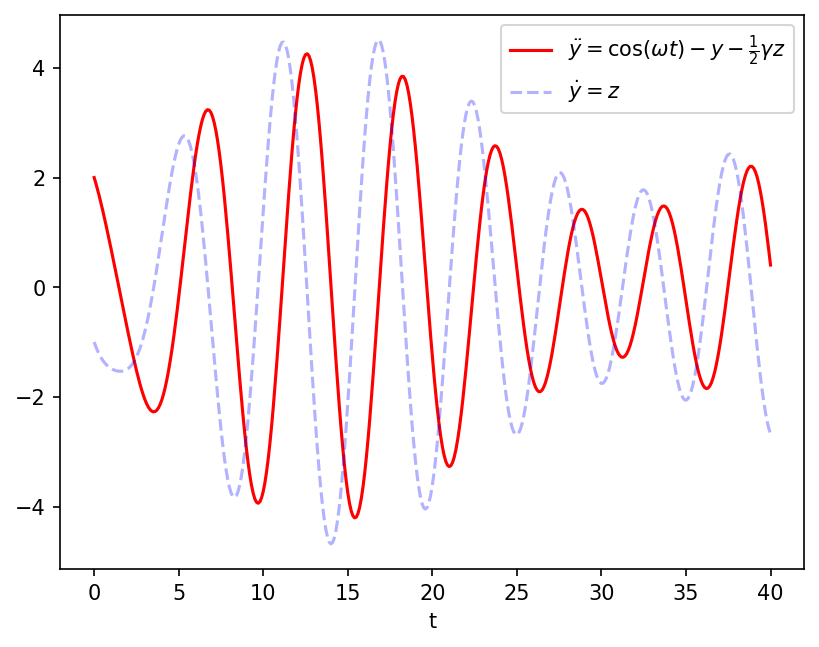

In [39]:
plt.figure(dpi=150)
plt.plot(ts, ys, "r", label=r"$\ddot y = \cos(\omega t) - y - \frac{1}{2}\gamma z$")
plt.plot(ts, zs, "b--", label=r"$\dot y = z$", alpha=0.3)
plt.xlabel("t")
plt.legend()

# Q4: Dominant Eigen Value and Eigen Vector of the matrix:

$$
\begin{pmatrix}
2 & 1 & 2 \\
2 & 2 & -2 \\
3 & 1 & 1
\end{pmatrix}
$$

In [ ]:
from library.matrix import Matrix
from library.eigen import get_eigen

In [ ]:
A = Matrix(
    [
        [2, 1, 2],
        [2, 2, -2],
        [3, 1, 1]
    ], name="A"
)

val, vec, i = get_eigen(A, epsilon=1e-3, seed=0.1)
print(f"Number of iterations: {i}")
print(f"Eigenvalue: {val}")
print(vec)